### Importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importing Train Data

In [2]:
train_hcp = pd.read_csv("Doceree-HCP_Train.csv", encoding="ISO-8859-1", dtype={'USERZIPCODE':'Int64', 'IS_HCP':'Int64'})
train_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0


### Data Pre-processing

In [3]:
# Getting Information about Train Data

train_hcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               113937 non-null  int64 
 1   DEVICETYPE       113937 non-null  object
 2   PLATFORM_ID      113937 non-null  int64 
 3   BIDREQUESTIP     113937 non-null  object
 4   USERPLATFORMUID  113933 non-null  object
 5   USERCITY         107578 non-null  object
 6   USERZIPCODE      109345 non-null  Int64 
 7   USERAGENT        113935 non-null  object
 8   PLATFORMTYPE     113937 non-null  object
 9   CHANNELTYPE      113937 non-null  object
 10  URL              113937 non-null  object
 11  KEYWORDS         113937 non-null  object
 12  TAXONOMY         32313 non-null   object
 13  IS_HCP           113936 non-null  Int64 
dtypes: Int64(2), int64(2), object(10)
memory usage: 12.4+ MB


In [4]:
# Checking Null Values for each column of Train Data

train_hcp.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64

In [5]:
# Checking Null Value for Target Column IS_HCP

train_hcp[train_hcp['IS_HCP'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
73790,74791,Mobile,9,47.147.27.131,e180c16e-a393-48aa-ac14-7353faad95ee,Hacienda Heights,91745,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.2minutemedicine.com/the-accord-tri...,Anemia|Delivery|Oncology|Medicine|Diabetes Mel...,NaN,<NA>


In [6]:
# Removing the Found Row Having Null Target Value

train_hcp.drop(index=73790, inplace=True)

In [7]:
# Verifying Target Column Values are Not Null

train_hcp[train_hcp['IS_HCP'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP


### Data Analysis

<Axes: xlabel='IS_HCP', ylabel='count'>

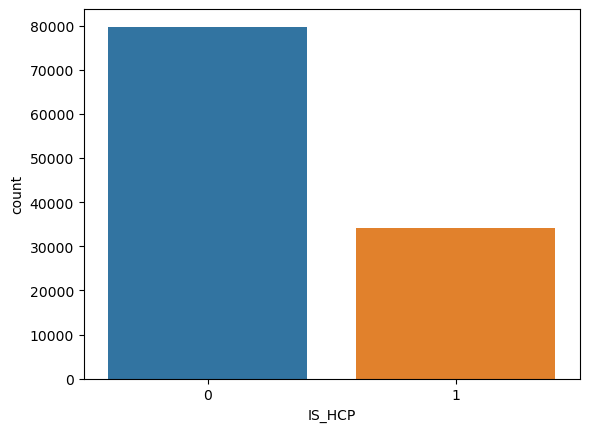

In [8]:
# Getting Distribution of Target Variable IS_HCP

sns.countplot(data=train_hcp, x='IS_HCP')

Through the above count plot, we can see that number of healthcare professionals are lesser than the non-healthcare professionals, so our training data has a certain bias.

### Feature Engineering and Feature Selection

In [9]:
# Method to calculate CIDR Block based on the ip block range as input

def Find_CIDR(ip_block):
    if ip_block >= 0 and ip_block <= 127:
        cidr_block = 0  # 'A' Block
    elif ip_block >= 128 and ip_block <= 191:
        cidr_block = 1  # 'B' BLock
    elif ip_block >= 192 and ip_block <= 223:
        cidr_block = 2  # 'C' Block
    elif ip_block >=224 and ip_block <= 239:
        cidr_block = 3  # 'D' Block
    elif ip_block >= 240 and ip_block <= 255:
        cidr_block = 4  # 'E' Block
    else:
        cidr_block = np.nan
        
    return cidr_block

In [10]:
# Method to categorize BIDREQUESTIP into CIDR Blocks

def CIDR(hcp_data):
    cidr_block = []
    for bid_request_ip in hcp_data:
        ip_block = int(bid_request_ip.split('.')[0])
        cidr = Find_CIDR(ip_block)
        cidr_block.append(cidr)
    return cidr_block

In [11]:
# Assigning new column CIDRBLOCK that contains CIDR Block categories based on BIDREQUESTIP

cidr_block = CIDR(train_hcp['BIDREQUESTIP'])
train_hcp.insert(loc=3, column='CIDRBLOCK', value=cidr_block)

train_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,1,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
1,1002,Desktop,2,0,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0
2,1003,Desktop,2,0,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
3,1004,Desktop,3,1,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
4,1005,Mobile,7,1,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0


We used values from BIDREQUESTIP column and converted the data into 5 CIDR Block categories inorder to drive more information, and reduce the number of categorical values from BIDREQUESTIP column.

In [12]:
# Verifying CIDRBLOCK does not contain Null Values

train_hcp['CIDRBLOCK'].isnull().sum()

0

In [13]:
# Finding various categories for DEVICETYPE column

train_hcp['DEVICETYPE'].value_counts()

Desktop    78423
Mobile     32064
Tablet      3425
Unknown       24
Name: DEVICETYPE, dtype: int64

In [14]:
# Method to find Device Type through the User Agent String

def findDevice(ua_string):
    if 'smarttv' in ua_string:
        device = 'Smart TV'
    elif 'mobile' in ua_string or 'android' in ua_string or 'iphone' in ua_string:
        device = 'Mobile'
    elif 'ubuntu' in ua_string or 'windows' in ua_string or 'linux' in ua_string \
    or 'macintosh' in ua_string or 'cros'in ua_string:
        device = 'Desktop'
    elif 'tablet' in ua_string or 'ipad' in ua_string:
        device = 'Tablet'
    else:
        device = 'Unknown'
    return device

In [15]:
# Method to caliberate Device Type through User Agent String, if DeviceType provided in data is Unknown

def caliberateDevice(hcp_useragent, hcp_devicetype):
    device_data = []
    
    for idx, dtype in enumerate(hcp_devicetype):
        if dtype=='Unknown':
            ua_string = hcp_useragent[idx]
            if ua_string=='NaN':
                device = 'Unknown'
            else:
                ua_string = ua_string.lower()
                device = findDevice(ua_string)
            device_data.append(device)
        else:
            device_data.append(dtype)
            
    return device_data

In [16]:
# Checking Null Values for USERAGENT column

train_hcp[train_hcp['USERAGENT'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
32201,33202,Unknown,2,0,43.135.176.112,cf927c4e-fb59-4322-b495-c08e1a40d64d,Santa Clara,95052,NaN,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/meeting-c...,influenza|chronic kidney disease|pain|nephrolo...,NaN,0
77681,78682,Unknown,2,0,43.153.60.225,ba0ce382-447d-4908-a4d8-e4da916ad645,NaN,<NA>,NaN,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/web-exclu...,influenza|pain|nephrology|disease|hepatology|h...,NaN,0


In [17]:
# Replacing Null Values with 'NaN' value for USERAGENT column

train_hcp.at[32201, 'USERAGENT'] = 'NaN'
train_hcp.at[77681, 'USERAGENT'] = 'NaN'

train_hcp[train_hcp['USERAGENT'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP


In [18]:
# Finding device type for entries where device type is provided as 'Unknown'

device_values = caliberateDevice(train_hcp['USERAGENT'], train_hcp['DEVICETYPE'])
train_hcp.insert(loc=1, column='DEVICE', value=device_values)

train_hcp.head()

,ID,DEVICE,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,Desktop,2,1,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
1,1002,Desktop,Desktop,2,0,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0
2,1003,Desktop,Desktop,2,0,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0
3,1004,Desktop,Desktop,3,1,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1
4,1005,Mobile,Mobile,7,1,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0


Inorder to reduce the Unknown Device types, we caliberated Device Types based on User Agent String from Training Data

In [19]:
# Getting unique values for newly created column DEVICE

train_hcp['DEVICE'].value_counts()

Desktop     78430
Mobile      32066
Tablet       3425
Smart TV       11
Unknown         4
Name: DEVICE, dtype: int64

In [20]:
# Checking entries where Device is caliberated as Unknown

train_hcp[train_hcp['DEVICE']=='Unknown']

,ID,DEVICE,DEVICETYPE,PLATFORM_ID,CIDRBLOCK,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
25061,26062,Unknown,Unknown,7,0,3.226.105.93,bc8a3bab-70c6-46f0-88c1-4ca470a70c53,Ashburn,20149,Google-Calendar-Importer,Online Medical Journal,Website,https://www.cureus.com/users/342506-salman-kha...,small|covid|nephrology|radiology|preventive me...,NaN,0
32201,33202,Unknown,Unknown,2,0,43.135.176.112,cf927c4e-fb59-4322-b495-c08e1a40d64d,Santa Clara,95052,NaN,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/meeting-c...,influenza|chronic kidney disease|pain|nephrolo...,NaN,0
60377,61378,Unknown,Unknown,5,0,66.249.66.73,7e9af839-b5af-4df3-9ba0-24dbb8590056,NaN,<NA>,Mediapartners-Google,Online Medical Journal,Website,https://fpnotebook.com/CV/Exam/CcsSymptmSvrtyI...,the|general|pain|fatigue|dyspnea|cardiac|,NaN,0
68392,69393,Unknown,Unknown,2,0,64.71.131.249,e817c670-759e-4230-add1-4954b987781b,Mountain Ranch,95246,Mozilla/5.0 (compatible; ev-crawler/1.0; +http...,Online Medical Journal,Website,https://www.gastroenterologyadvisor.com/,Transplantation|Technology|Chronic|Neoplasms|U...,NaN,0


We keep these Unknown device types as they are, because there is no further processing that can be done.

In [21]:
# Dropping Redudant Columns from Train Data

train_hcp.drop(['ID', 'DEVICETYPE', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY', 'USERZIPCODE', 'USERAGENT', 'CHANNELTYPE', 'TAXONOMY'], axis=1, inplace=True)
train_hcp.head()

,DEVICE,PLATFORM_ID,CIDRBLOCK,PLATFORMTYPE,URL,KEYWORDS,IS_HCP
0,Desktop,2,1,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0
1,Desktop,2,0,Online Medical Journal,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,0
2,Desktop,2,0,Online Medical Journal,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,0
3,Desktop,3,1,Online Medical Journal,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,1
4,Mobile,7,1,Online Medical Journal,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,0


In [22]:
# Method to calculate url_domain given url as input

def FindDomain(hcp_data):
    domains=[]
    for url in hcp_data:
        url_domain = url
        if ".org" in url:
            url_domain = url.split('.org')[0]
            url_domain += '.org/'
        else:
            url_domain = url.split('.com')[0]
            url_domain += '.com/'
        domains.append(url_domain)
    return domains

In [23]:
# Assigning new column URLDOMAIN based on values from URL column

url_domain = FindDomain(train_hcp['URL'])
train_hcp.insert(loc=5, column='URLDOMAIN', value=url_domain)

In [24]:
# Getting various unique values from URLDOMAIN column

train_hcp['URLDOMAIN'].value_counts()

https://www.cureus.com/                      20913
https://www.clinicaladvisor.com/             15529
https://www.cancertherapyadvisor.com/        10381
https://www.empr.com/                         9182
https://www.rheumatologyadvisor.com/          6786
https://www.renalandurologynews.com/          6480
https://www.gastroenterologyadvisor.com/      5925
https://www.2minutemedicine.com/              3890
https://www.dermatologyadvisor.com/           3705
https://www.neurologyadvisor.com/             3579
https://fpnotebook.com/                       3214
https://www.goodrx.com/                       2978
https://www.psychiatryadvisor.com/            2923
https://www.pulmonologyadvisor.com/           2880
https://www.clinicalpainadvisor.com/          2751
https://www.medicalbag.com/                   2332
https://www.rarediseaseadvisor.com/           1535
https://www.thecardiologyadvisor.com/         1380
https://www.infectiousdiseaseadvisor.com/     1124
https://www.grantsformedical.co

In [25]:
# Getting total number of unique entries from URLDOMAIN column

train_hcp['URLDOMAIN'].nunique()

37

Inorder to reduce a large number of categoricalvalues from URL column, we extracted their domain and stored in a separate column

In [26]:
# Dropping Redudant Columns

train_hcp.drop(['PLATFORM_ID','URL','KEYWORDS'], axis=1, inplace=True)
train_hcp.head()

,DEVICE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN,IS_HCP
0,Desktop,1,Online Medical Journal,https://www.cancertherapyadvisor.com/,0
1,Desktop,0,Online Medical Journal,https://www.cancertherapyadvisor.com/,0
2,Desktop,0,Online Medical Journal,https://www.cancertherapyadvisor.com/,0
3,Desktop,1,Online Medical Journal,https://globalrph.com/,1
4,Mobile,1,Online Medical Journal,https://www.cureus.com/,0


In [27]:
# Encoding for Unique Values of PLATFORMTYPE

PLATFORMTYPE = {
    "Electronic Health Record" : 0,
    "Online Medical Journal" : 1,
    "Online Learning Portal" : 2,
    "Medical News Platform" : 3,
    "Tele-medicine Platform" : 4
}
max_pltype = 4

In [28]:
# Encoding for Unique Values of URLDOMAIN

URLDOMAIN = {
    "https://www.h2hdigitalrx.com/" : 0,
    "https://www.clinicaladvisor.com/" : 1,
    "https://www.cancertherapyadvisor.com/" : 2,
    "https://www.empr.com/" : 3,
    "https://www.rheumatologyadvisor.com/" : 4,
    "https://www.renalandurologynews.com/" : 5,
    "https://www.gastroenterologyadvisor.com/" : 6,
    "https://www.dermatologyadvisor.com/" : 7,
    "https://www.neurologyadvisor.com/" : 8,
    "https://www.psychiatryadvisor.com/" : 9,
    "https://www.pulmonologyadvisor.com/" : 10,
    "https://www.clinicalpainadvisor.com/" : 11,
    "https://www.medicalbag.com/" : 12,
    "https://www.rarediseaseadvisor.com/" : 13,
    "https://www.thecardiologyadvisor.com/" : 14,
    "https://www.infectiousdiseaseadvisor.com/" : 15,
    "https://www.endocrinologyadvisor.com/" : 16,
    "https://www.oncologynurseadvisor.com/" : 17,
    "https://www.hematologyadvisor.com/" : 18,
    "https://www.ophthalmologyadvisor.com/" : 19,
    "https://www.optometryadvisor.com/" : 20,
    "https://uat.clinicalpainadvisor.com/" : 21,
    "https://uat.clinicaladvisor.com/": 22,
    "https://globalrph.com/" : 23,
    "https://allmedx.com/" : 24,
    "https://fpnotebook.com/" : 25,
    "https://www.fpnotebook.com/" : 25,
    "https://www.goodrx.com/" : 26,
    "https://www.cureus.com/" : 27,
    "https://radrounds.com/" : 28,
    "https://www.2minutemedicine.com/" : 29,
    "https://www.grantsformedical.com/" : 30,
    "https://radiopaedia.org/" : 31,
    "https://consumer.healthday.com/" : 32,
    "https://www.epainassist.com/" : 33,
    "https://epainassist.com/" : 33,
    "https://precisionmdapp.com/" : 34
}
max_urldomain = 34

In [29]:
# Method to Label Encode values from column PLATFORMTYPE

def LabelEncodePlatformType(hcp_data):
    global max_pltype
    platform_type = []
    for pltype in hcp_data:
        if pltype in PLATFORMTYPE:
            platform_type.append(PLATFORMTYPE[pltype])
        else:
            max_pltype += 1
            PLATFORMTYPE[pltype] = max_pltype
            platform_type.append(max_pltype)
    return platform_type

In [30]:
# Method to Label Encode values from column URLDOMAIN

def LabelEncodeUrlDomain(hcp_data):
    global max_urldomain
    url_domain = []
    for url in hcp_data:
        if url in URLDOMAIN:
            url_domain.append(URLDOMAIN[url])
        else:
            max_urldomain += 1
            URLDOMAIN[url] = max_urldomain
            url_domain.append(max_urldomain)
    return url_domain

In [31]:
# Importing LabelEncoder for encoding DEVICE

from sklearn.preprocessing import LabelEncoder

In [32]:
# Label Encoding DEVICE, PLATFORMTYPE, URLDOMAIN

train_hcp['PLATFORMTYPE'] = LabelEncodePlatformType(train_hcp['PLATFORMTYPE'])
train_hcp['URLDOMAIN'] = LabelEncodeUrlDomain(train_hcp['URLDOMAIN'])

le_device = LabelEncoder()
train_hcp['DEVICE'] = le_device.fit_transform(train_hcp['DEVICE'])

train_hcp.head()

,DEVICE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN,IS_HCP
0,0,1,1,2,0
1,0,0,1,2,0
2,0,0,1,2,0
3,0,1,1,23,1
4,1,1,1,27,0


For a certain PLATFORM_ID, PLATFORMTYPE and URLDOMAIN were the same. So inorder to preserve the pattern, we did manual label encoding.

<Axes: >

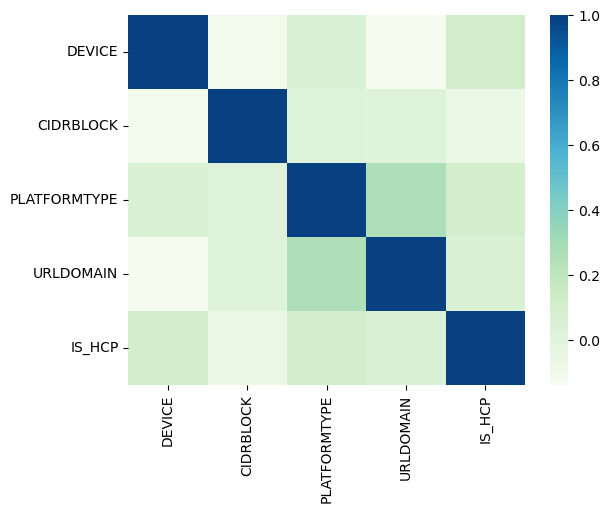

In [33]:
# Getting Correlations of Features and Target Variable

sns.heatmap(train_hcp.corr(), cmap="GnBu")

### Building Training and Validation Sets

In [34]:
# Separating Data into Features X and Target Y

X = train_hcp.drop(['IS_HCP'], axis=1)
Y = train_hcp['IS_HCP']

In [35]:
# Splitting data into training and validation sets for model building

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

We divided our Training Data into 70% Train Data and 30% Validation Data for Model Building Phase.

### Model Building

In [36]:
# Building Decision Tree Model, Model Training

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
Y_pred_dt = dt_clf.predict(X_test)

In [37]:
# Transforming target predictions in desired format needed for evaluation

Y_true = Y_test.values.astype("int")
Y_true

array([0, 0, 0, ..., 0, 0, 1])

In [38]:
# Transforming target predictions in desired format needed for evaluation

Y_pred_dt = Y_pred_dt.astype("int")
Y_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
# Building Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_pred_rf = rf_clf.predict(X_test)

Y_true = Y_test.values.astype("int")
Y_pred_rf = Y_pred_rf.astype("int")

### Model Evaluation

In [40]:
# Model Evaluation using Metric Accuracy, evaluating Decision Tree Model

from sklearn.metrics import accuracy_score

print("Accuracy for Decision Tree Model: ",accuracy_score(Y_true, Y_pred_dt))

Accuracy for Decision Tree Model:  0.7891811240162664


In [41]:
# Evaluating accuracy of Random Forest Model

print("Accuracy for Random Forest Model: ",accuracy_score(Y_true, Y_pred_rf))

Accuracy for Random Forest Model:  0.7892396360551184


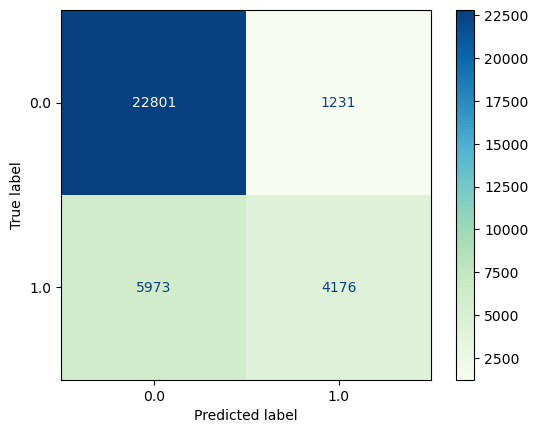

In [42]:
# Building Confusion Matrix of the Selected Model: Random Forest

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_true, Y_pred_rf,labels=rf_clf.classes_)
display_cm = ConfusionMatrixDisplay(cm, display_labels=dt_clf.classes_)
display_cm.plot(cmap='GnBu')

By comparing the accuracies of both the models: Decision Tree and Random Forest, we can see that Random Forest Model has outperformed. <br>
    Hence selecting Random Forest Model for further predictions on Test Data.

### Importing Test Data

In [43]:
test_hcp = pd.read_csv("Doceree-HCP_Test.csv", encoding="ISO-8859-1")
test_hcp.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


## Data Pre-processing

In [44]:
# Checking Null values for USERAGENT of Test Data

test_hcp[test_hcp['USERAGENT'].isnull()]

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
24858,140359,Unknown,2,47.88.10.56,763f48e4-983f-4b36-ad82-fd03b457577f,San Mateo,94402.0,NaN,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/meeting-c...,influenza|chronic kidney disease|pain|nephrolo...


In [45]:
# Processing Test Data to transform into desired format like Train Data

cidr_block = CIDR(test_hcp['BIDREQUESTIP'])
test_hcp.insert(loc=3, column='CIDRBLOCK', value=cidr_block)

test_id = test_hcp['ID']

test_hcp.at[24858, 'USERAGENT'] ='NaN'
device_values = caliberateDevice(test_hcp['USERAGENT'], test_hcp['DEVICETYPE'])
test_hcp.insert(loc=0, column='DEVICE', value=device_values)

test_hcp.drop(['ID', 'DEVICETYPE', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY', 'USERZIPCODE', 'USERAGENT', 'CHANNELTYPE'], axis=1, inplace=True)

url_domain = FindDomain(test_hcp['URL'])
test_hcp.insert(loc=5, column='URLDOMAIN', value=url_domain)

test_hcp.drop(['PLATFORM_ID','URL','KEYWORDS'], axis=1, inplace=True)
test_hcp.head()

,DEVICE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN
0,Desktop,0,Online Medical Journal,https://www.clinicaladvisor.com/
1,Mobile,0,Online Medical Journal,https://www.ophthalmologyadvisor.com/
2,Desktop,1,Online Medical Journal,https://www.psychiatryadvisor.com/
3,Desktop,0,Online Medical Journal,https://www.cureus.com/
4,Desktop,0,Online Medical Journal,https://www.renalandurologynews.com/


In [46]:
# Label Encoding PLATFORMTYPE for Test Data

test_hcp['PLATFORMTYPE'] = LabelEncodePlatformType(test_hcp['PLATFORMTYPE'])

In [47]:
# Label Encoding URLDOMAIN for Test Data

test_hcp['URLDOMAIN'] = LabelEncodeUrlDomain(test_hcp['URLDOMAIN'])

In [48]:
# Label Encoding DEVICE for Test Data

test_hcp['DEVICE'] = le_device.transform(test_hcp['DEVICE'])
test_hcp.head()

,DEVICE,CIDRBLOCK,PLATFORMTYPE,URLDOMAIN
0,0,0,1,1
1,1,0,1,19
2,0,1,1,9
3,0,0,1,27
4,0,0,1,5


### Generating Predictions

In [49]:
# Finding Predictions using Random Forest Model

predictions = rf_clf.predict(test_hcp)
predictions = predictions.astype("int")
predictions

array([0, 1, 0, ..., 0, 0, 1])

In [50]:
# Creating DataFrame to store Predictions with their corresponding ID

test_pred = pd.DataFrame(test_id, columns=['ID'])
test_pred['IS_HCP'] = predictions
test_pred.head()

,ID,IS_HCP
0,115501,0
1,115502,1
2,115503,0
3,115504,0
4,115505,0


In [51]:
# Saving Predictions DataFrame into csv File

test_pred.to_csv("Doceree-HCP_Submission.csv", index=False)